# Explanatory Visualisations
## by (Maha Haj Meftah)




## Investigation Overview


> In this investigation, I wanted to look at different variables  that could be used to predict if an loan will be completed. The main focus was on the the following variables: 
- loanStatus(Target Variable)
- CreditGrade(the most relevent variable to help)
- LoanOriginalAmount
- BorrowerRate
- MonthlyLoanPayment


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#for google colab
#from google.colab import drive
#drive.mount('/content/drive')
#%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
# load in the dataset into a pandas dataframe
loan_data= pd.read_csv('prosperLoanData.csv')

**Filling Empty values with NULL**

In [4]:
for i in loan_data.columns:
    loan_data[i] = loan_data[i].replace('', np.nan)

**Checking LoanStatus Column and Removing Categories contributing less than 1.5% to the data**

In [5]:
(loan_data.LoanStatus.value_counts()*100)/len(loan_data)

Current                   49.655511
Completed                 33.416713
Chargedoff                10.525115
Defaulted                  4.404188
Past Due (1-15 days)       0.707408
Past Due (31-60 days)      0.318597
Past Due (61-90 days)      0.274713
Past Due (91-120 days)     0.266814
Past Due (16-30 days)      0.232585
FinalPaymentInProgress     0.179924
Past Due (>120 days)       0.014043
Cancelled                  0.004388
Name: LoanStatus, dtype: float64

In [6]:
del_LoanStatus = (loan_data.LoanStatus.value_counts()*100)/len(loan_data)
del_LoanStatus = del_LoanStatus[(del_LoanStatus < 1.5)]

loan_data.drop(labels = loan_data[loan_data.LoanStatus.isin(del_LoanStatus.index)].index, inplace=True)
loan_data.reset_index(drop=True, inplace=True)

print("So now we are left with",loan_data.shape ,"rows & columns.")

print(loan_data.LoanStatus.unique())

So now we are left with (111660, 81) rows & columns.
['Completed' 'Current' 'Defaulted' 'Chargedoff']


**Checking EmploymentStatus Column and Removing Categories 
contributing less than 1.5% to the data**

In [7]:
print(loan_data.EmploymentStatus.unique())
(loan_data.EmploymentStatus.value_counts()*100)/len(loan_data)

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']


Employed         58.588572
Full-time        23.529464
Self-employed     5.383306
Not available     4.787749
Other             3.295719
Part-time         0.967222
Not employed      0.724521
Retired           0.706609
Name: EmploymentStatus, dtype: float64

In [8]:
del_EmploymentStatus = (loan_data.EmploymentStatus.value_counts()*100)/len(loan_data)
del_EmploymentStatus = del_EmploymentStatus[(del_EmploymentStatus < 1.5)]

loan_data.drop(labels = loan_data[loan_data.EmploymentStatus.isin(del_EmploymentStatus.index)].index, inplace=True)
loan_data.reset_index(drop=True, inplace=True)

print("So now we are left with",loan_data.shape ,"rows & columns.")

print(loan_data.EmploymentStatus.unique())

So now we are left with (108982, 81) rows & columns.
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan]


In [9]:
def univariate(df,col,vartype,hue =None,title=None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.title(title)    
    plt.show()


## Distribution of Loan status 

**The half of the loans are current which can not be studied. We will be interested in the other half.The majorty of laons are completed with 36477 loan , than comes chargedd off loans with 11420 loan, the smallest part of loans are defaulted ones with 4873 loan.**
 

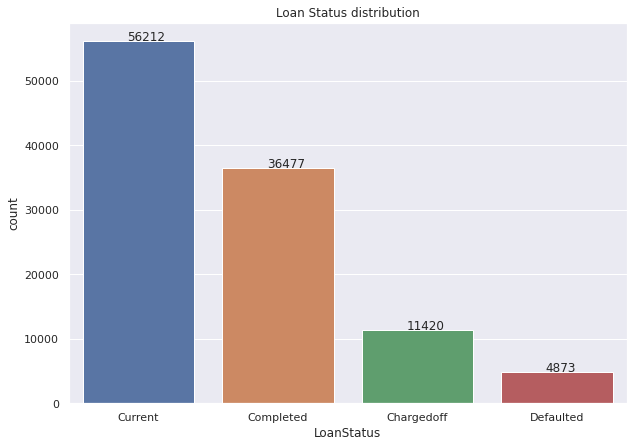

In [10]:
univariate(df=loan_data,col='LoanStatus',vartype=1,title='Loan Status distribution')


## Loan Status Vs Credit Grade 

> **We can see how accurate is the Grading  to determin the person Credit worthiness by ploting the composition of grades for the different status of loans: The completed loans have the hieghest percentage of excelent grades A and A by 2.6% and 2.2% respecitively, among the grades assinged to completed status. In the opposite the Defaulted loans has the highest percentage of bad grades HR and NC 0.8  0.6 respectively among the grades assinged to default status**

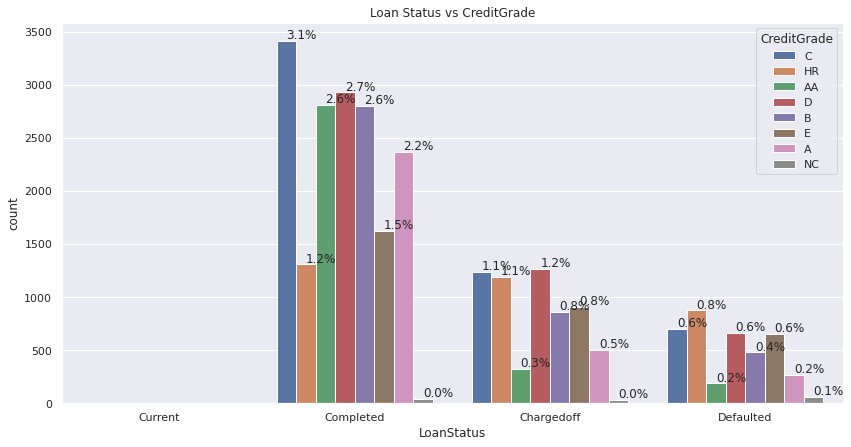

In [11]:
univariate(df=loan_data,col='LoanStatus',vartype=1,hue='CreditGrade',title='Loan Status vs CreditGrade')


##  Monthly payment vs CreditGrade
> **We can ensure that CreditGrade is accurate ploting the monthly payment and The CreditGrade: As we can observe the highest the credit grade is the highest the monthly payment is .Actually The grades A, AA and B have the highest amount of monthly payment and NC has the lowest one.**

Mean of Montly Loan Payment with AA Grade:  303.6081058328322
Mean of Montly Loan Payment with A Grade:  320.817525477707
Mean of Montly Loan Payment with B Grade:  295.6606758387642
Mean of Montly Loan Payment with C Grade:  221.07879065420562
Mean of Montly Loan Payment with D Grade:  178.80679513602638
Mean of Montly Loan Payment with E Grade:  130.23452919020716
Mean of Montly Loan Payment with HR Grade:  93.62328592592591
Mean of Montly Loan Payment with NC Grade:  86.73007092198583


Text(0.5, 1.0, 'Monthly Payment vs Credit Grade')

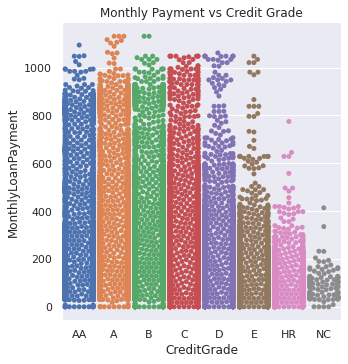

In [12]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment

df_CG_MLP = pd.concat([loan_data.loc[loan_data['CreditGrade'] == "AA" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "A" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "B" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "C" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "D" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "E" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "HR" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "NC" , ['CreditGrade', 'MonthlyLoanPayment']]])
# print(df_CG_MLP)

for i in ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']:
    print("Mean of Montly Loan Payment with", i, "Grade: ", (loan_data.loc[loan_data['CreditGrade'] == i , ['CreditGrade', 'MonthlyLoanPayment']])['MonthlyLoanPayment'].mean())


# df_CG_MLP.plot(x='CreditGrade', y='MonthlyLoanPayment', style='o')
sns.catplot(x="CreditGrade", y="MonthlyLoanPayment", kind="swarm", data=df_CG_MLP)
plt.title('Monthly Payment vs Credit Grade')

### CredittGrade vs LoanOrginalAmount vs BorrowerRate 
> As shown in the graph High Credit Grade (A) is associeted to low borrower rate independently from the amount of the loan.

In [13]:
#e create a random sample of 10000 loans
np.random.seed(2022)
sample = np.random.choice(loan_data.shape[0],10000)
loan_data_subset = loan_data.loc[sample]

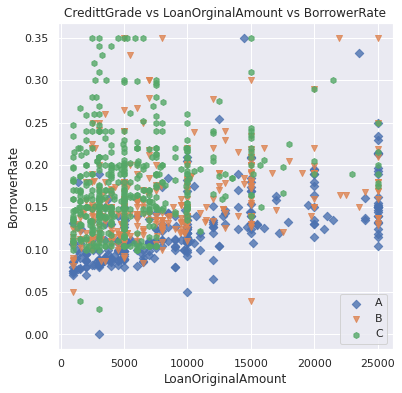

In [14]:
plt.figure(figsize=(6,6))

ttype_marker =[['A','D'],['B','v'],['C','h']]
for ttype,marker in ttype_marker:
  plot_data = loan_data_subset.loc[loan_data_subset['CreditGrade']==ttype]
  sns.regplot(data =plot_data,x='LoanOriginalAmount',y='BorrowerRate',marker=marker,fit_reg=False)
plt.legend(['A','B','C'])
plt.title('CredittGrade vs LoanOrginalAmount vs BorrowerRate')
plt.show()

### Generate Slideshow


In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert explanatory-visualisations-slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 875119 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
